# Scalping Strategy
---

Below is an outline of how **Average True Range (ATR)** can be incorporated into a **scalping strategy**. The idea is to use ATR—a volatility measure—to size trades and set precise entry/exit thresholds that aim to capture small, quick profits while strictly managing risk.



### 1. What Is ATR?

- **Definition**: ATR measures an asset’s **average true range** of price movement over a specified period (e.g., 14 bars).  
- **Purpose**: Helps gauge market volatility, showing how much price typically fluctuates from bar to bar.

<br>

### 2. Core Components of an ATR Scalping Strategy

1. **Identify Scalp Opportunities**  
   - Use a **short-term chart** (e.g., 1-minute or 5-minute candles) to spot micro trends or breakouts.  
   - Confirm momentum with indicators such as moving averages, RSI, or volume spikes.

2. **Set ATR-Based Stop-Loss**  
   - Define a tight stop-loss as a fraction of the current ATR (e.g., **0.5× ATR**).  
   - This means if volatility increases, your stop widens slightly to avoid premature exits; if volatility decreases, your stop tightens.

3. **Define Profit Targets with ATR**  
   - Aim for a profit target also aligned with ATR (e.g., **1× ATR** or **1.5× ATR**).  
   - This ensures that your reward typically exceeds or matches your risk multiple, while still capturing short moves.

4. **Entry Triggers**  
   - **Breakout Entry**: Enter on a price break above/below a recent consolidation range. Confirm that ATR is sufficient to justify a scalp (i.e., there’s enough volatility for a quick move).  
   - **Pullback Entry**: Wait for a small retracement in a fast-moving market, then enter in the direction of the trend if volatility remains elevated.

5. **Trade Management**  
   - Once in a position, **trail your stop** behind price movements using a fraction of ATR (e.g., a moving stop-loss at **0.5× ATR** behind current price).  
   - Exit either if your profit target is hit or if the price triggers the trailing stop-loss.

6. **Risk Control & Position Sizing**  
   - Adjust position size so that **total risk per trade** (stop-loss distance × position size) remains constant (e.g., 1–2% of your trading capital).  
   - Avoid over-leveraging; scalping can involve frequent trades, magnifying small losses if not managed properly.

<br>

### 3. Example Workflow

1. **Choose a Time Frame**: 1-minute or 5-minute chart, focusing on the most liquid trading hours.  
2. **Calculate ATR**: Use a 14-period ATR on the chosen time frame to measure current volatility.  
3. **Signal Detection**:  
   - Look for a range breakout.  
   - Ensure ATR is above a threshold (e.g., at least \\$0.20 for a stock typically moving \\$1.00 a day, or 1.5× its average to confirm heightened volatility).  
4. **Enter Trade**: Place a **buy** (or **sell**) order at breakout.  
5. **Stop-Loss & Target**:  
   - Stop at **0.5× ATR** below (for a long) or above (for a short) the entry price.  
   - Profit target at **1× ATR** (or a ratio you’ve backtested).  
6. **Monitor & Adjust**: If the trade moves in your favor, trail the stop by a fixed fraction of ATR to lock in gains.

<br>

### 4. Pros & Cons of ATR Scalping

**Pros**  
- **Volatility-Adjusted**: ATR helps adapt stops and targets to changing market conditions.  
- **Clear Risk Management**: Positions scale automatically with volatility, reducing arbitrary guesswork.  
- **Frequent Opportunities**: Works well in liquid, volatile markets, offering many scalps per session.

**Cons**  
- **Transaction Costs**: High trade frequency can amplify commissions/spreads.  
- **False Breakouts**: Fast entries in choppy markets risk whipsaws.  
- **Constant Vigilance**: Requires active monitoring to manage tight stops and frequent signals.

<br>

#### Key Takeaways

An **ATR scalping strategy** tailors entries, stops, and targets to real-time market volatility. By using a fraction of the ATR for stop-loss levels and setting a profit target tied to the ATR multiple, traders can **dynamically manage risk** and **pursue consistent small gains**. Effective implementation, however, depends on **low-latency execution**, **minimal transaction costs**, and **disciplined trade management** to navigate the rapid-fire nature of scalping.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import talib
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('MSFT_Jan_Apr_2018.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.tail()

,close,high,low,open,volume
date,,,,,
2018-04-12 13:40:00,93.10,93.11,93.06,93.07,20485
2018-04-12 13:41:00,93.04,93.09,93.01,93.09,41444
2018-04-12 13:42:00,93.08,93.10,93.04,93.04,39905
2018-04-12 13:43:00,93.19,93.20,93.07,93.08,75414
2018-04-12 13:44:00,93.16,93.20,93.14,93.18,36836


In the following code, we calculate the Average True Range (ATR) for each minute in the dataset and then apply a 5-minute rolling mean to smooth out short-term fluctuations. We’ve chosen the 5-minute window manually for demonstration purposes, but you can adjust this parameter based on the specific characteristics of your dataset or trading approach.

In [3]:
df['ATR'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod=30)
df['MA5'] = df['ATR'].rolling(5).mean()

After we compute the **ATR** and its **5-minute rolling mean**, we look for moments (each minute) where the **ATR** exceeds its **rolling mean**. When the ATR rises above its rolling average, it’s considered an “ATR breakout,” signaling that **short-term volatility** has spiked relative to **recent volatility**—a potential trigger for scalping or other short-term trading opportunities.

In [4]:
df['ATR_B'] = np.where((df['ATR'] > df['MA5']), True, False)
df.tail()

,close,high,low,open,volume,ATR,MA5,ATR_B
date,,,,,,,,
2018-04-12 13:40:00,93.10,93.11,93.06,93.07,20485,0.120633,0.117347,True
2018-04-12 13:41:00,93.04,93.09,93.01,93.09,41444,0.119612,0.118235,True
2018-04-12 13:42:00,93.08,93.10,93.04,93.04,39905,0.117625,0.118961,False
2018-04-12 13:43:00,93.19,93.20,93.07,93.08,75414,0.118038,0.119796,False
2018-04-12 13:44:00,93.16,93.20,93.14,93.18,36836,0.116103,0.118402,False


After detecting a spike in volatility (an ATR breakout), we confirm the direction of price movement before entering a trade. Specifically, if the high of the breakout candle surpasses the three-candle high prior to it, we interpret this as an upward move and open a long position. Conversely, if the low of the breakout candle falls below the three-candle low preceding it, we see this as a downward move and initiate a short position.

So first, compute the three-candle rolling high

In [5]:
df['3C_high'] = df['high'].rolling(3).max()

Now you need to see if the fourth candle is higher than the highest of the previous three candles

In [6]:
df['4C_high'] = np.where(df['high'] > df['3C_high'].shift(1), True, False)
df.tail()

,close,high,low,open,volume,ATR,MA5,ATR_B,3C_high,4C_high
date,,,,,,,,,,
2018-04-12 13:40:00,93.10,93.11,93.06,93.07,20485,0.120633,0.117347,True,93.41,False
2018-04-12 13:41:00,93.04,93.09,93.01,93.09,41444,0.119612,0.118235,True,93.41,False
2018-04-12 13:42:00,93.08,93.10,93.04,93.04,39905,0.117625,0.118961,False,93.11,False
2018-04-12 13:43:00,93.19,93.20,93.07,93.08,75414,0.118038,0.119796,False,93.20,True
2018-04-12 13:44:00,93.16,93.20,93.14,93.18,36836,0.116103,0.118402,False,93.20,False


...and similarly with the lows.

In [7]:
df['3C_low'] = df['low'].rolling(3).min()

df['4C_low'] = np.where(df['low'] < df['3C_low'].shift(1), True, False)

Below, we **flag** potential entry signals as **+1** (long) or **-1** (short) using two primary conditions:

1. **ATR Breakout** (indicating a surge in volatility)  
2. **Four-Candle High/Low** (confirming the directional move)

Only when **both** the ATR breakout occurs and the price surpasses (or dips below) the four-candle high/low do we enter a corresponding long or short trade.

Flag long positions

In [8]:
df['long'] = np.where(df['ATR_B'] & df['4C_high'], 1, 0)

Flag short positions

In [9]:
df['short'] = np.where(df['ATR_B'] & df['4C_low'], -1, 0)

Finally add the long and short position flags together

In [10]:
df['positions'] = df['long'] + df['short']
df.tail()

,close,high,low,open,volume,ATR,MA5,ATR_B,3C_high,4C_high,3C_low,4C_low,long,short,positions
date,,,,,,,,,,,,,,,
2018-04-12 13:40:00,93.10,93.11,93.06,93.07,20485,0.120633,0.117347,True,93.41,False,93.02,False,0,0,0
2018-04-12 13:41:00,93.04,93.09,93.01,93.09,41444,0.119612,0.118235,True,93.41,False,93.01,True,0,-1,-1
2018-04-12 13:42:00,93.08,93.10,93.04,93.04,39905,0.117625,0.118961,False,93.11,False,93.01,False,0,0,0
2018-04-12 13:43:00,93.19,93.20,93.07,93.08,75414,0.118038,0.119796,False,93.20,True,93.01,False,0,0,0
2018-04-12 13:44:00,93.16,93.20,93.14,93.18,36836,0.116103,0.118402,False,93.20,False,93.04,False,0,0,0


In [11]:
def signals(close, positions, title, colour):
   
    plt.figure(figsize=(16, 8))
    ax  = close.plot(figsize=(16, 8))
    ax2 = positions.plot(secondary_y=True, figsize=(16, 8), color=colour, ax=ax)

    ax.set_ylabel('Price')
    ax.set_xlabel('Time')
    ax2.set_ylabel('Signal')
    ax2.set_title(title)

    plt.legend()
    plt.grid();

Let's plot the first two hours

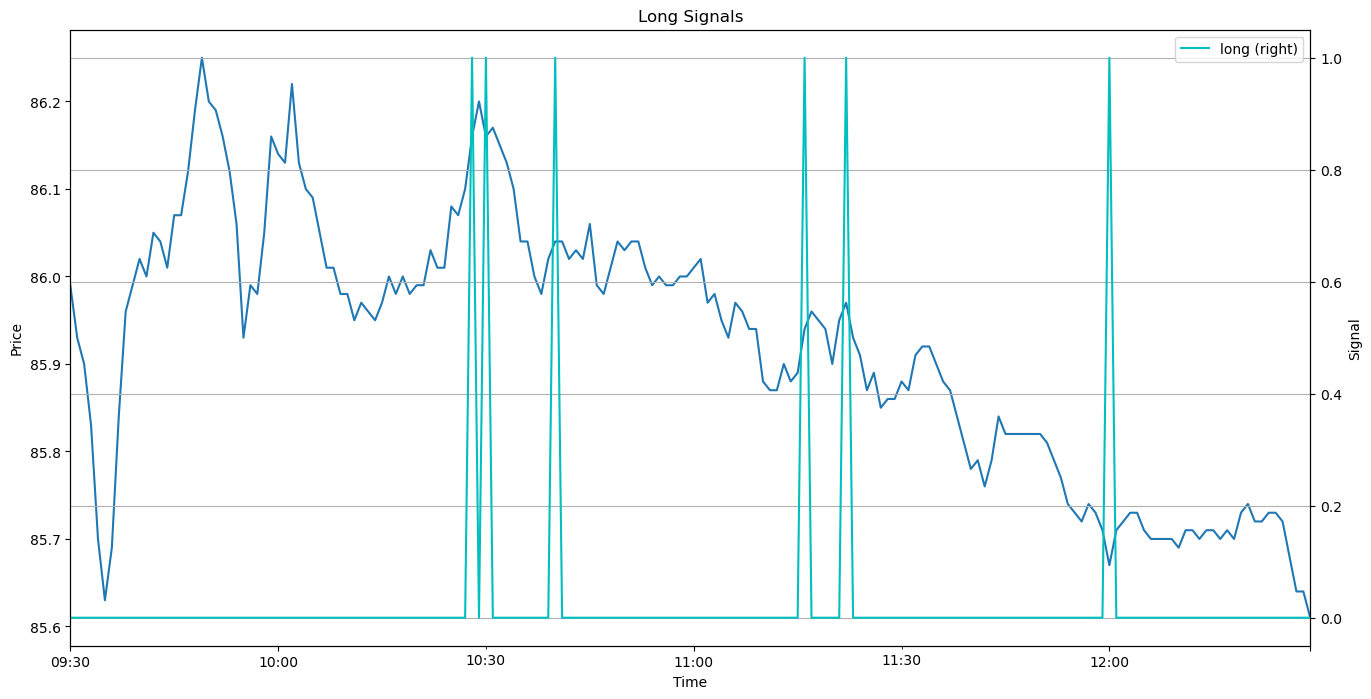

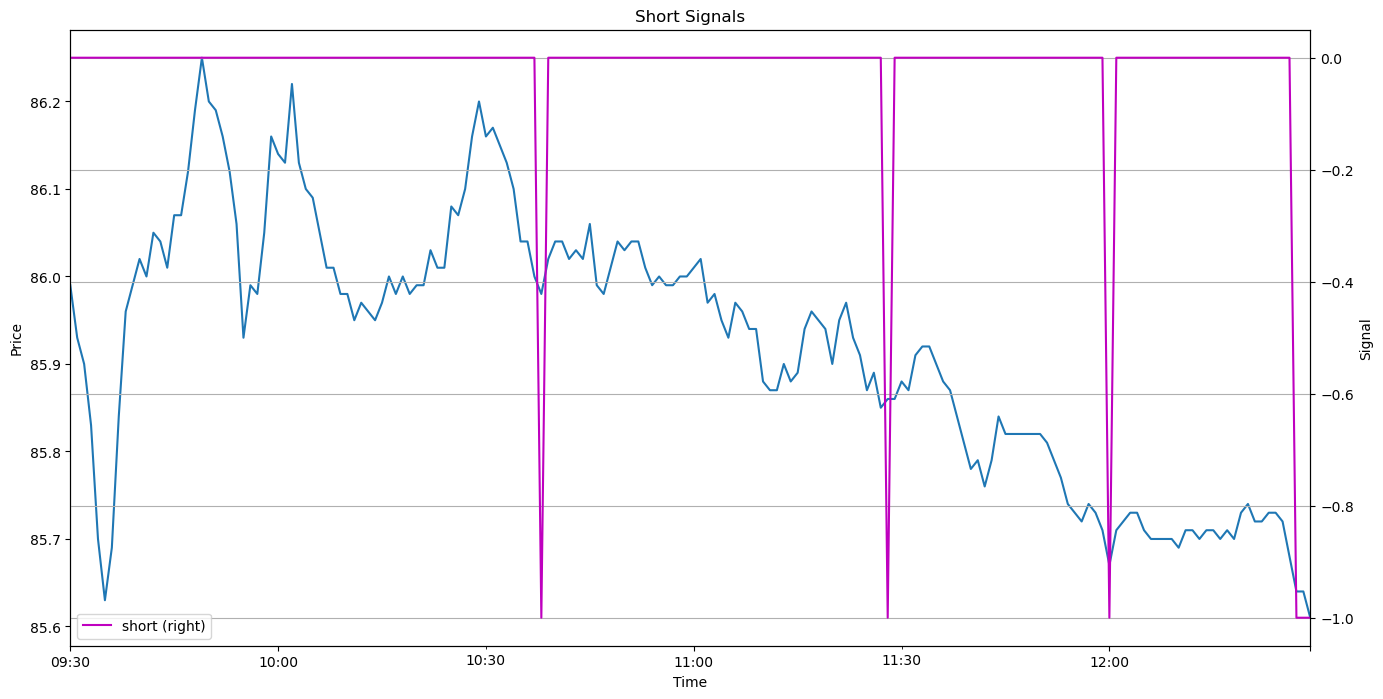

In [12]:
mins = 180

signals(df['close'][: mins], df['long'][:mins],  'Long Signals', 'c')
signals(df['close'][: mins], df['short'][:mins], 'Short Signals','m')

Below, we outline how we calculate **exit returns** once we’ve established a long or short position. First, we **manually define** the take-profit and stop-loss thresholds. Then, for each row (minute) in the DataFrame:

1. **Open a Position**  
   - If we detect a **long** or **short** signal (based on earlier flags) and don’t currently have an open position, we enter a trade.

2. **Monitor Price**  
   - As time progresses, we check whether the price hits either our **take-profit** or **stop-loss** level.  
   - If it does, we **close** the position at that minute’s price.

3. **End-of-Day Close**  
   - Any **open position** is closed automatically at the end of each trading day, ensuring we don’t carry positions overnight.

By following this procedure, we calculate the **return** for each position upon exit (whether it’s triggered by a take-profit, a stop-loss, or an end-of-day close).

In [13]:
current_position = 0
stop_loss = ''
take_profit = ''
entry_time = np.nan
entry_price = np.nan
take_profit_threshold = 0.03
stop_loss_threshold = 0.01

trades = pd.DataFrame()

A function to compute the PnL for exit of a long position

> #1 Calculating the cost of the trade. Feel free to change 

In [14]:
def long_exit(df, time, entry_time, entry_price):
    pnl = round(df.loc[time, 'close'] - entry_price, 2)
    trading_cost = df.loc[time, 'close'] * 0.0002 * 2       #1
    pnl = pnl - trading_cost
    return pd.DataFrame([('Long',entry_time,entry_price,time,df.loc[time, 'close'],pnl)])

...and for short position.

In [15]:
def short_exit(df, time, entry_time, entry_price):
    pnl = round(entry_price - df.loc[time, 'close'], 2) 
    trading_cost = df.loc[time, 'close'] * 0.0002 * 2       #1
    pnl = pnl - trading_cost
    return pd.DataFrame([('Short',entry_time,entry_price,time,df.loc[time, 'close'],pnl)])

Run the strategy

In [16]:
for time in df.index:
    
    # Long Position
    if (current_position == 0) and (df.loc[time, 'positions'] == 1):
        current_position = 1
        entry_time  = time
        entry_price = df.loc[time, 'close']
        stop_loss   = entry_price * (1 - stop_loss_threshold)
        take_profit = entry_price * (1 + take_profit_threshold)

    
    # Long Exit
    elif (current_position == 1):
        # Checking for stop loss and take profit
        if df.loc[time, 'close'] < stop_loss or df.loc[time, 'close'] > take_profit:
            trade_details = long_exit(df, time, entry_time, entry_price)
            trades = pd.concat([trades, trade_details], ignore_index=True)
            current_position = 0

    
    # Short Position
    if (current_position == 0) and (df.loc[time, 'positions'] == -1):
        current_position = -1
        entry_time  = time
        entry_price = df.loc[time, 'close']
        stop_loss   = entry_price * (1 + stop_loss_threshold)
        take_profit = entry_price * (1 - take_profit_threshold)

   
    # Short Exit
    elif (current_position == -1):
        # Checking for stop loss and take profit
        if df.loc[time, 'close'] > stop_loss or df.loc[time, 'close'] < take_profit:
            trade_details = short_exit(df, time, entry_time, entry_price)
            trades = pd.concat([trades, trade_details], ignore_index=True)
            current_position = 0

    
    # Close Open Position at End of Day
    if time.hour == 15 and time.minute == 59:
        if current_position == 1:
            trade_details = long_exit(df, time, entry_time, entry_price)
            trades = pd.concat([trades, trade_details], ignore_index=True)
            current_position = 0

        elif current_position == -1:
            trade_details = short_exit(df, time, entry_time, entry_price)
            trades = pd.concat([trades, trade_details], ignore_index=True)
            current_position = 0

Add column labels to the dataframe

In [17]:
trades.columns=['Position', 'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price', 'PnL']
trades.head()

,Position,Entry Time,Entry Price,Exit Time,Exit Price,PnL
0,Long,2018-01-02 10:28:00,86.16,2018-01-02 15:59:00,85.91,-0.284364
1,Long,2018-01-03 09:30:00,86.08,2018-01-03 15:59:00,86.33,0.215468
2,Long,2018-01-04 09:30:00,86.60,2018-01-04 15:59:00,87.12,0.485152
3,Long,2018-01-05 09:30:00,87.54,2018-01-05 15:59:00,88.11,0.534756
4,Long,2018-01-08 09:30:00,88.16,2018-01-08 15:59:00,88.20,0.004720


Now plot the returns

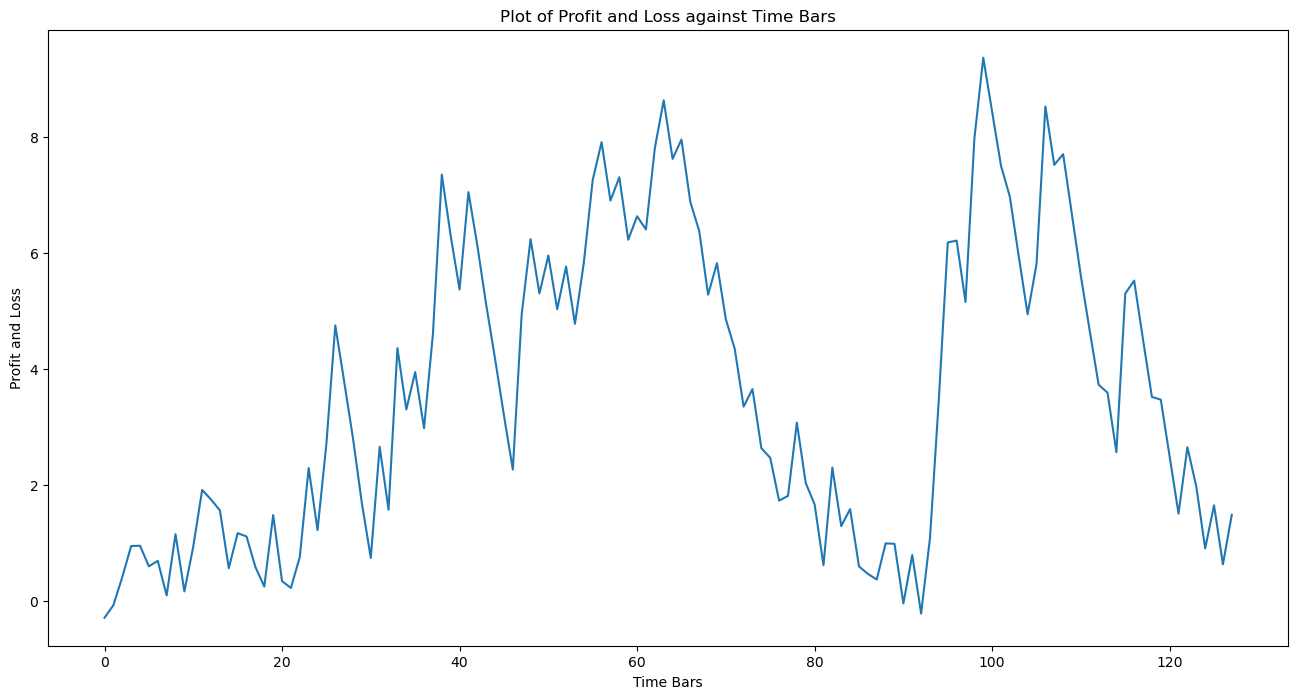

In [18]:
plt.figure(figsize=(16, 8))

plt.title("Plot of Profit and Loss against Time Bars")
plt.xlabel("Time Bars")
plt.ylabel("Profit and Loss")

trades['PnL'].cumsum().plot();

## Summary statistics of the ATR Scalping Strategy

In [19]:
analytics = pd.DataFrame(index=['ATR + Candle Breakout'])

analytics['num_of_long']  = len(trades.loc[trades.Position == 'Long'])
analytics['num_of_short'] = len(trades.loc[trades.Position == 'Short'])

analytics['total_trades'] = analytics.num_of_long + analytics.num_of_short

analytics['profitable_trades']  = len(trades.loc[trades.PnL > 0])
analytics['loss_making_trades'] = len(trades.loc[trades.PnL <= 0])

analytics['win_percentage']  = 100 * analytics.profitable_trades /  analytics.total_trades
analytics['loss_percentage'] = 100 * analytics.loss_making_trades / analytics.total_trades

analytics['per_trade_PnL_profitable_trades']  = trades.loc[trades.PnL > 0].PnL.mean()
analytics['per_trade_PnL_loss_making_trades'] = trades.loc[trades.PnL <= 0].PnL.mean()

analytics.T

,ATR + Candle Breakout
num_of_long,71.000000
num_of_short,57.000000
total_trades,128.000000
profitable_trades,54.000000
loss_making_trades,74.000000
win_percentage,42.187500
loss_percentage,57.812500
per_trade_PnL_profitable_trades,1.120624
per_trade_PnL_loss_making_trades,-0.797632


## Exit optimization

Exit optimization involves refining how and when you close a trade to maximize gains or minimize losses. This can include setting dynamic stops (e.g., trailing stops that move up as the price increases) or profit targets based on recent volatility or technical levels. Instead of using static thresholds for take-profit and stop-loss, you might continuously adjust these levels in response to real-time data—such as changes in volatility (e.g., via ATR), shifts in momentum indicators, or emerging support/resistance zones. By systematically adjusting exit rules to market conditions, you can reduce the likelihood of exiting too early (leaving profits on the table) or holding a position too long (risking deeper drawdowns).

We've already looked at the next three blocks of code. I'm just going to package them up as functions so they're easier to use

Computing the PnL for exit of a long position

<br>

In [20]:
def long_exit(data, time, entry_price):
    pnl = round(data.loc[time, 'close'] - entry_price, 2)
    data.loc[time, 'pnl'] = pnl

Computing the PnL for exit of a short position

In [21]:
def short_exit(data, time, entry_price):
    pnl = round(entry_price - data.loc[time, 'close'], 2)
    data.loc[time, 'pnl'] = pnl

Running the strategy

In [22]:
def pnl(data, stop_loss_threshold, take_profit_threshold):
    
    current_position = 0
    stop_loss = ''
    take_profit = ''
    entry_price = np.nan
    data['pnl'] = np.nan

    for time in data.index:
        
        # Long Position
        if (current_position == 0) and (data.loc[time, 'positions'] == 1):
            current_position = 1
            entry_price = data.loc[time, 'close']
            stop_loss   = data.loc[time, 'close'] * (1-stop_loss_threshold)
            take_profit = data.loc[time, 'close'] * (1+take_profit_threshold)

        # Long Exit
        elif (current_position == 1):
            # Check for sl and tp
            if data.loc[time, 'close'] < stop_loss or data.loc[time, 'close'] > take_profit:
                long_exit(data, time, entry_price)
                current_position = 0

        # Short Position
        if (current_position == 0) and (data.loc[time, 'positions'] == -1):
            current_position = data.loc[time, 'positions']
            entry_price = data.loc[time, 'close']
            stop_loss = data.loc[time, 'close'] * (1+stop_loss_threshold)
            take_profit = data.loc[time, 'close'] * (1-take_profit_threshold)
        
        # Short Exit
        elif (current_position == -1):
            # Check for sl and tp
            if data.loc[time, 'close'] > stop_loss or data.loc[time, 'close'] < take_profit:
                short_exit(data, time, entry_price)
                current_position = 0

        # Close Open Position at End of Day
        if time.hour == 15 and time.minute == 59:
            if current_position == 1:
                long_exit(data, time, entry_price)
                current_position = 0

            elif current_position == -1:
                short_exit(data, time, entry_price)
                current_position = 0
                
    return data.pnl.sum()

<br>

**Test-train splitting** is a fundamental practice in machine learning and predictive modeling, where a dataset is divided into two (or sometimes three) parts:

1. **Training Set**: Used to **train** your model—i.e., to learn patterns, weights, or rules from the data.  
2. **Test Set**: Held back to **evaluate** how well the model generalizes to unseen data.  

By isolating a portion of the data (the test set) from the training phase, you can more reliably measure the model’s performance without the bias that arises when a model is tested on the same data used for training. This **prevents overfitting**, where a model might memorize training examples but fail to perform well on new, real-world data.

Let's split the data, 70% for training and the remaining 30% for testing

<br>

In [23]:
split = int(df.shape[0] * 0.7)

train = df.iloc[0:split].copy()
test  = df.iloc[split:].copy()

The function below computes the ATR, incorporates various technical features, and then utilizes these combined metrics to generate entry and exit signals. This approach helps us identify moments in the market when volatility and price action align with our strategy’s criteria for opening or closing positions.

In [24]:
def features(data):
    # Calculate Average True Range(ATR) and rolling mean
    data['ATR'] = talib.ATR(data['high'], data['low'], data['close'], timeperiod=30)
    data['MA5'] = data['ATR'].rolling(5).mean()

    # Calculate the first minute where ATR breaks out its rolling mean
    data['ATR_B'] = np.where((data['ATR'] > data['MA5']), True, False)

    # Calculate the 3-candle rolling high Check 4th candle is higher than previous 3 candles
    data['3C_high'] = data['high'].rolling(3).max()
    data['4C_high'] = np.where(data['high'] > data['3C_high'].shift(1), True, False)
    data['long']    = np.where( data['ATR_B'] & data['4C_high'], 1, 0)

    # Calculate the 3-candle rolling low Check 4th candle is low than previous 3 candles
    data['3C_low'] = data['low'].rolling(3).min()
    data['4C_low'] = np.where(data['low'] < data['3C_low'].shift(1), True, False)
    data['short'] = np.where(data['ATR_B'] & data['4C_low'], -1, 0)
    
    data['positions'] = data['long'] + data['short']
    
    return data

Apply the function above to bothe the training and test data

In [25]:
train = features(train)
test  = features(test)

Set the range of stop-loss and take-profit

In [26]:
sl_range = np.arange(0.01, 0.08, 0.01)
tp_range = np.arange(0.01, 0.08, 0.01)

Initiate a numpy matrix to contain each stop-loss and take-profit combination

In [27]:
matrix = np.zeros((len(sl_range), len(tp_range)))

Below, we train our exit thresholds (stop-loss and take-profit) by iterating over a range of values in the first two-thirds of the dataset (the training portion). For each stop-loss/take-profit combination, we simulate trades and compute the profit and loss (PnL) to evaluate how effectively that threshold performs. 

> Note: Because this optimization loop runs through multiple parameter combinations, it can take a couple of minutes to complete.

In [28]:
max_val = -np.inf
params  = None

for i, tp in enumerate(tp_range):
    for j, sl in enumerate(sl_range):
        matrix[i][j] = pnl(train, sl, tp)
        if matrix[i][j] > max_val:
            max_val = matrix[i][j]
            params  = (sl, tp)

print(f'The best return: {round(max_val, 2)} and optimal params are {params}')

The best return: 7.38 and optimal params are (0.01, 0.06)


## Plot the Exit Threshold Matrix

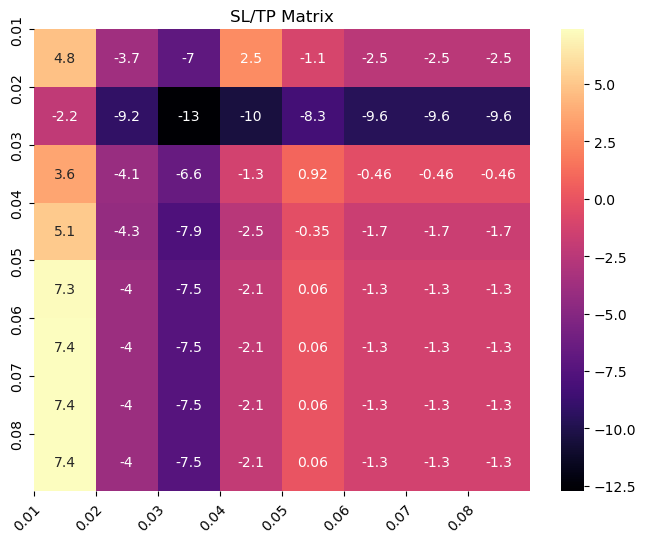

In [29]:
plt.rc('figure', figsize=(8, 6))
fig, ax = plt.subplots()
sns.heatmap(matrix, annot=True, cmap="magma")

ax.set_xticks(np.arange(len(tp_range)))
ax.set_yticks(np.arange(len(sl_range)))

ax.set_xticklabels([round(x, 2) for x in tp_range])
ax.set_yticklabels([round(x, 2) for x in sl_range])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("SL/TP Matrix");

Now we are going to run the scalping strategy on the test set. The thresholds are manually set to the values we used intially

In [30]:
tp = 0.03
sl = 0.01

intial_paramaters = pnl(test, sl, tp)

Let's redo that but this time we will use our optimised parameters

In [31]:
optimised_parameters = pnl(test, params[0], params[1])

finally let's compare our results

In [32]:
print(f'The average PnL on the test set using initial parameters: {round(intial_paramaters, 2)}')
print(f'The average PnL on the test set using optimised parameters: {round(optimised_parameters, 2)}')

The average PnL on the test set using initial parameters: 0.52
The average PnL on the test set using optimised parameters: 0.62


**Grid search** is a systematic approach to **hyperparameter tuning** where you exhaustively evaluate model performance (or strategy returns, in trading contexts) over a defined grid of parameter values. Essentially, you create a Cartesian product of potential parameter settings—such as different stop-loss and take-profit levels—then **train or backtest** the model/strategy using each combination. Finally, you compare the results (e.g., accuracy, profit, Sharpe ratio) across all combinations to **identify the best-performing** parameters. While grid search can be computationally intensive, it is straightforward to implement, guarantees a thorough exploration of the parameter space, and is particularly useful when the dimensionality of parameters is limited or when computational resources permit a brute-force approach.